In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('anime.csv')
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


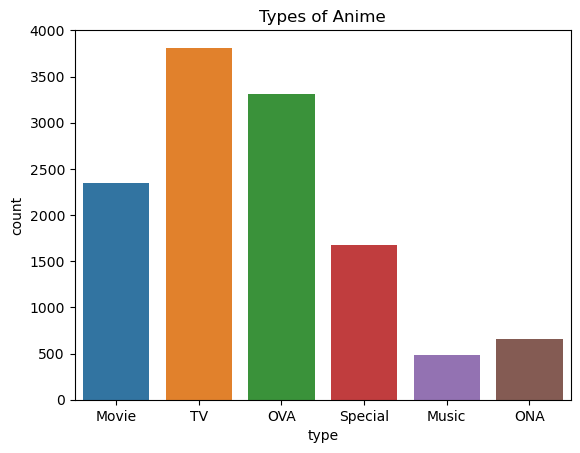

In [36]:
ax = sns.countplot(data=data, x='type')
ax.set(title="Types of Anime")
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [5]:
data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
data['genre'] = data['genre'].fillna(data['genre'].mode()[0])
data['type'] = data['type'].fillna(data['type'].mode()[0])
data['rating'] = data['rating'].fillna(data['rating'].mean())

In [7]:
data.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

C:\Users\sholo\AppData\Local\Temp\ipykernel_3020\3310825548.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, linewidth=5, annot=True)


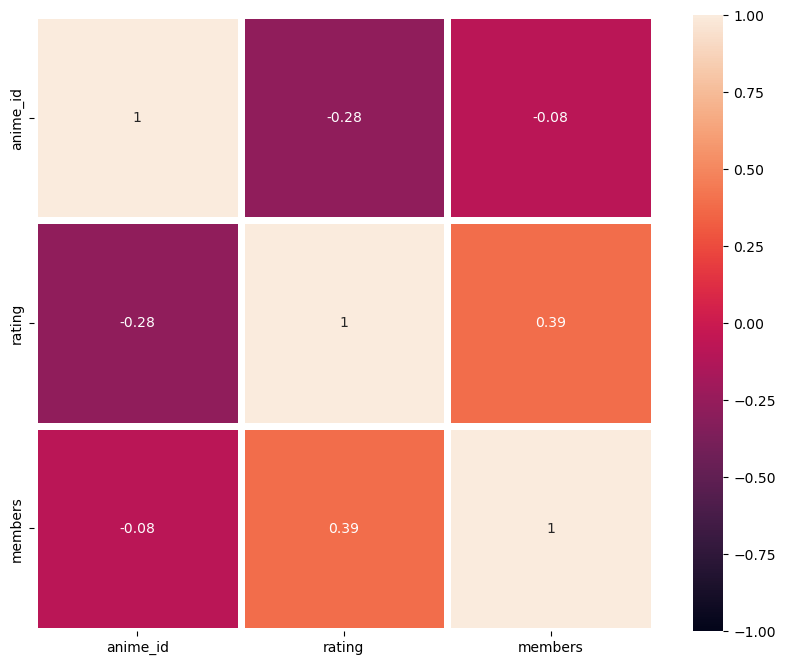

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, linewidth=5, annot=True)

In [9]:
columns_to_keep = ['rating', 'genre']
x=data[columns_to_keep].copy()
x

,rating,genre
0,9.37,"Drama, Romance, School, Supernatural"
1,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,9.25,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9.17,"Sci-Fi, Thriller"
4,9.16,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...
12289,4.15,Hentai
12290,4.28,Hentai
12291,4.88,Hentai
12292,4.98,Hentai


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['genre'] = le.fit_transform(x['genre'])

In [11]:
x['genre']

0        2686
1         161
2         534
3        3240
4         534
         ... 
12289    2903
12290    2903
12291    2903
12292    2903
12293    2903
Name: genre, Length: 12294, dtype: int32

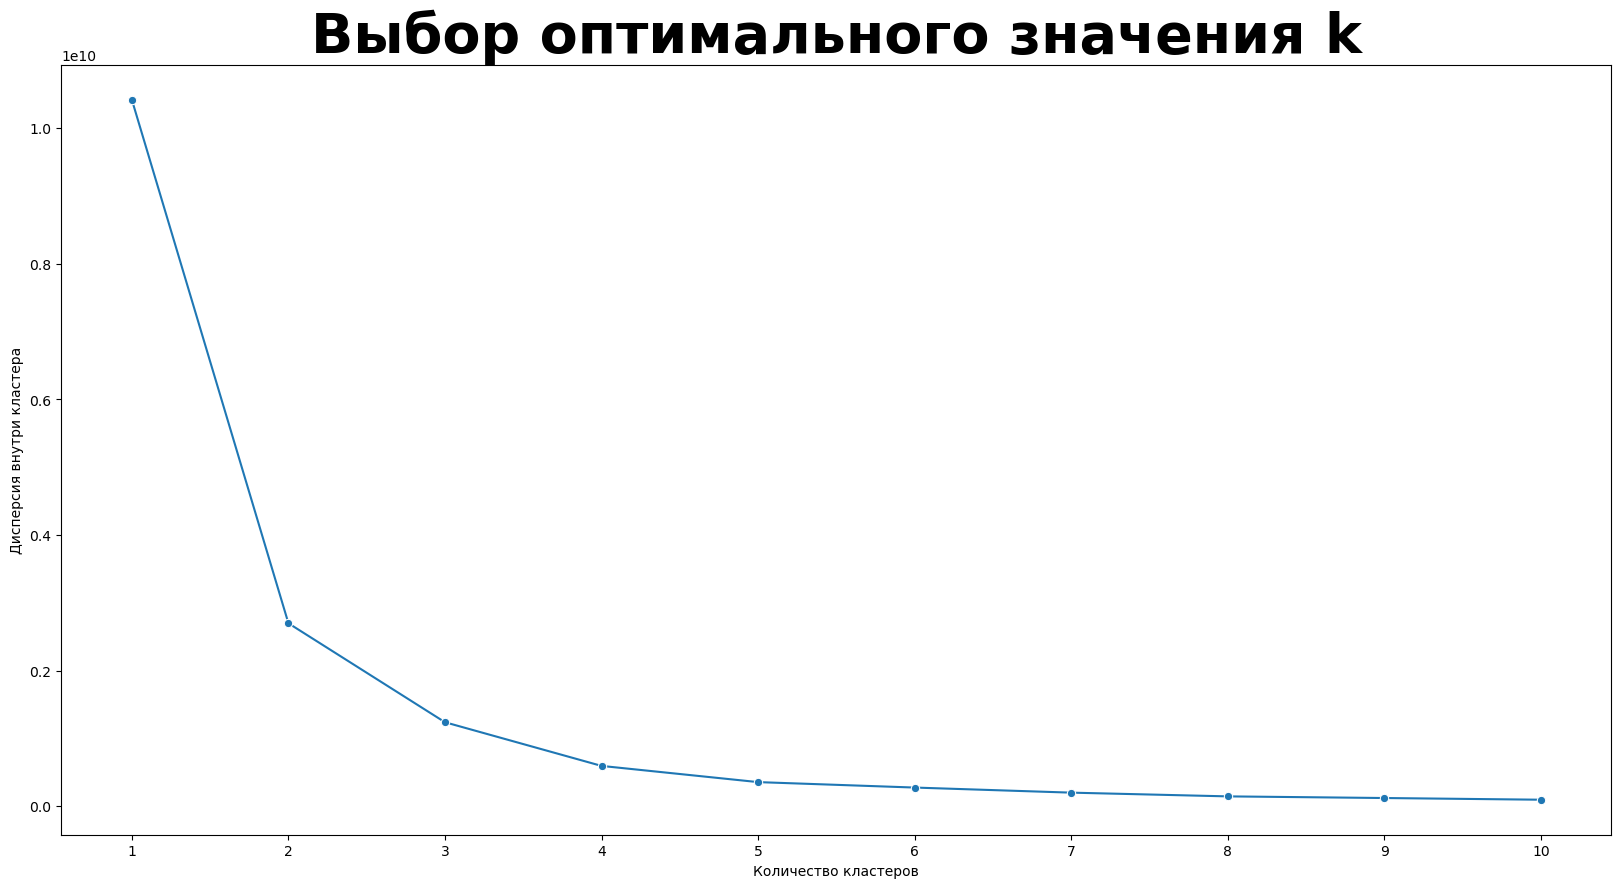

In [12]:
from sklearn.cluster import KMeans
inertia_score = []
# Тренировка модели кластеризации с разным параметром k - числа кластеров
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,
                    n_init = 10,
                    random_state = 17)
    kmeans.fit(x)
    inertia_score.append(kmeans.inertia_)
# Построение графика    
fig = plt.subplots(figsize = (20,10))
sns.lineplot(x = range(1,11),
             y = inertia_score,
             marker = 'o')
plt.title('Выбор оптимального значения k', fontsize = 40, fontweight = 'bold')
plt.xlabel('Количество кластеров')
plt.ylabel('Дисперсия внутри кластера')
plt.xticks(range(1,11))
plt.show()

In [52]:
kmeans = KMeans(n_clusters=3,n_init=10,algorithm='elkan')
y_kmeans = kmeans.fit_predict(x)#labels
y_kmeans

array([2, 0, 0, ..., 2, 2, 2])

In [53]:
centroids = kmeans.cluster_centers_
centroids

array([[   6.76535292,  696.58664204],
       [   6.46306258, 1925.40513047],
       [   6.27538067, 2899.44726951]])

In [54]:
data_labels = pd.DataFrame()
data_labels['KMeans'] = y_kmeans
data_labels

,KMeans
0,2
1,0
2,0
3,2
4,0
...,...
12289,2
12290,2
12291,2
12292,2


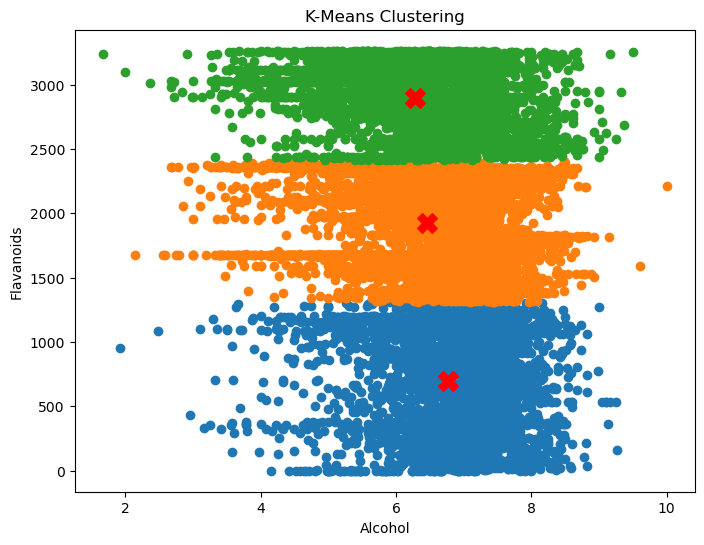

In [55]:
X = np.array(x)
plt.figure(figsize=(8, 6))

# Визуализируем данные по кластерам
for i in range(3):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1])

# Визуализируем центры кластеров
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')

plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('K-Means Clustering')
plt.show()

In [56]:
X=pd.DataFrame(x,columns=('rating', 'genre'))
y=np.array(y_kmeans)
X['cluster']=y
X['genre']=le.inverse_transform(X['genre'])

In [57]:
X

,rating,genre,cluster
0,9.37,"Drama, Romance, School, Supernatural",2
1,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili...",0
2,9.25,"Action, Comedy, Historical, Parody, Samurai, S...",0
3,9.17,"Sci-Fi, Thriller",2
4,9.16,"Action, Comedy, Historical, Parody, Samurai, S...",0
...,...,...,...
12289,4.15,Hentai,2
12290,4.28,Hentai,2
12291,4.88,Hentai,2
12292,4.98,Hentai,2


In [58]:
new = X.loc[X['cluster']==0][['rating', 'genre']]
new

,rating,genre
1,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,9.25,"Action, Comedy, Historical, Parody, Samurai, S..."
4,9.16,"Action, Comedy, Historical, Parody, Samurai, S..."
6,9.13,"Action, Adventure, Shounen, Super Power"
8,9.10,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...
12221,5.11,"Action, Comedy, Demons, Hentai, Martial Arts, ..."
12225,5.08,"Action, Comedy, Hentai, Romance, Supernatural"
12242,4.69,"Action, Hentai, Sci-Fi"
12244,4.60,"Action, Hentai"


In [59]:
new_2 = X.loc[X['cluster']==1][['rating', 'genre']]
new_2

,rating,genre
5,9.15,"Comedy, Drama, School, Shounen, Sports"
14,8.93,"Comedy, Drama, School, Shounen, Sports"
15,8.93,"Adventure, Drama, Supernatural"
17,8.88,"Adventure, Fantasy, Historical, Mystery, Seine..."
20,8.83,"Comedy, Drama, Shounen, Sports"
...,...,...
12263,3.11,"Comedy, Hentai"
12268,2.86,"Comedy, Hentai, Historical"
12272,4.14,"Comedy, Hentai, Parody"
12273,4.00,"Comedy, Hentai, Parody"


In [60]:
new_3 = X.loc[X['cluster']==2][['rating','genre']]
new_3

,rating,genre
0,9.37,"Drama, Romance, School, Supernatural"
3,9.17,"Sci-Fi, Thriller"
7,9.11,"Drama, Military, Sci-Fi, Space"
10,9.06,"Drama, Fantasy, Romance, Slice of Life, Supern..."
11,9.05,"Drama, School, Shounen"
...,...,...
12289,4.15,Hentai
12290,4.28,Hentai
12291,4.88,Hentai
12292,4.98,Hentai
